In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
plt.rcParams["figure.figsize"] = (5,4)

In [2]:
file_path = 'results/dict/'
file_name = os.listdir(file_path)

In [3]:
clip = 2.0
seed = 1
folds = 5
num_feat = 16
epoch = 100
# lr = 0.5
alpha = 0.5
mode = 'fair'
num_draw = 100000

# Performance

## Adult

In [22]:
noise_scale = [35.0, 13.125, 7.1875, 5.0, 3.88671875, 1.8603515625, 1.185302734375, 0.95703125, 0.83740234375] 
epsilon = [0.1, 0.25, 0.5, 0.75, 1.0, 2.5, 5.0, 7.5, 10.0]

In [23]:
performance = []
for ns in noise_scale:
    num_file = 0
    test_acc = 0
    for i, file in enumerate(file_name):
        if ('adult_' in file) and ('sigma_{}'.format(ns) in file) and ('onebatch_' in file):
            # print(file)
            with open('{}{}'.format(file_path,file), 'rb') as f:
                res = pickle.load(f)
                test_acc += res['test_history_acc'][-1]
                num_file += 1
    performance.append(test_acc/num_file)

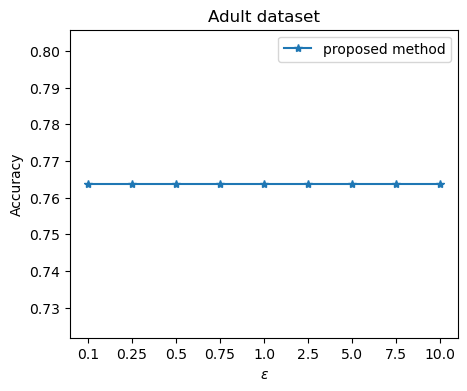

In [24]:
plt.plot(range(len(epsilon)), performance, '-*', label = 'proposed method')
# plt.plot(range(len(epsilon)), np.ones(len(epsilon))*0.8, '-o', label = 'no-DP')
plt.ylabel(r'Accuracy')
plt.xlabel(r'$\epsilon$')
plt.xticks(range(len(epsilon)), epsilon)
plt.title('Adult dataset')
plt.legend()

In [25]:
t = [norm.ppf(0.975, loc=0, scale=i*clip) for i in noise_scale]
def bound(t, clip):
    return 0.1*(2*clip+2*t)/2
bd = []
for i, n in enumerate(t):
    bd.append(bound(n, 0.04))

In [26]:
max_deviation = []
for ns in noise_scale:
    num_file = 0
    dev = 0
    for i, file in enumerate(file_name):
        if ('adult_' in file) and ('sigma_{}'.format(ns) in file) and ('onebatch_' in file):
            with open('{}{}'.format(file_path,file), 'rb') as f:
                res = pickle.load(f)
                # print(res.keys())
                dev += max(res['male_norm'][-1], res['female_norm'][-1])
                num_file += 1
    max_deviation.append(dev/num_file)

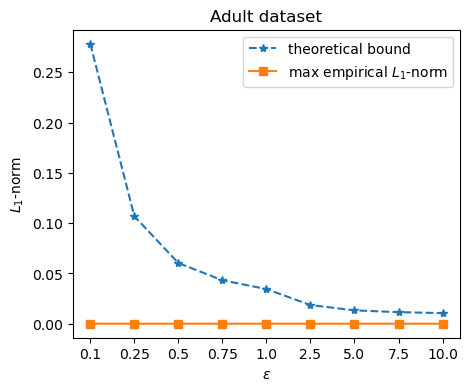

In [27]:
# eps = [0.5, 1.0, 2.0, 5.0]
plt.plot(range(len(epsilon)), bd, '--*', label='theoretical bound')
# plt.plot(range(len(epsilon)), new_bd, '--*', label='new bound')
plt.plot(range(len(epsilon)), max_deviation, '-s', label=r'max empirical $L_1$-norm')
plt.ylabel(r'$L_1$-norm')
plt.xlabel(r'$\epsilon$')
plt.title('Adult dataset')
plt.xticks(range(len(epsilon)), epsilon)
plt.legend()

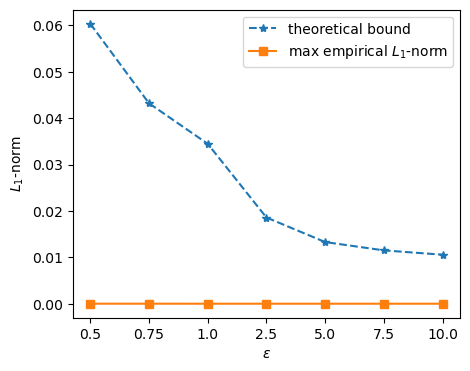

In [28]:
# eps = [0.5, 1.0, 2.0, 5.0]
plt.plot(range(len(epsilon)-2), bd[2:], '--*', label='theoretical bound')
# plt.plot(range(len(epsilon)-2), new_bd[2:], '--*', label='new bound')
plt.plot(range(len(epsilon)-2), max_deviation[2:], '-s', label=r'max empirical $L_1$-norm')
plt.ylabel(r'$L_1$-norm')
plt.xlabel(r'$\epsilon$')
plt.xticks(range(len(epsilon)-2), epsilon[2:])
plt.legend()

## Bank

In [32]:
noise_scale = [18.59375, 8.26171875, 4.599609375, 3.3251953125, 2.66845703125] 
epsilon = [1.0, 2.5, 5.0, 7.5, 10.0]

In [33]:
performance = []
for ns in noise_scale:
    num_file = 0
    test_acc = 0
    for i, file in enumerate(file_name):
        if ('bank_' in file) and ('sigma_{}'.format(ns) in file):
            print(file)
            with open('{}{}'.format(file_path,file), 'rb') as f:
                res = pickle.load(f)
                test_acc += res['test_history_acc'][-1]
                num_file += 1
    performance.append(test_acc/num_file)

bank_onebatch_fold_0_sigma_18.59375_C_0.04_29112022_174516.pkl
bank_onebatch_fold_0_sigma_8.26171875_C_0.04_29112022_175255.pkl
bank_onebatch_fold_0_sigma_8.26171875_C_0.04_29112022_18432.pkl
bank_onebatch_fold_0_sigma_8.26171875_C_0.04_29112022_18038.pkl
bank_onebatch_fold_0_sigma_8.26171875_C_0.04_29112022_17495.pkl
bank_onebatch_fold_0_sigma_8.26171875_C_0.04_29112022_175648.pkl
bank_onebatch_fold_0_sigma_4.599609375_C_0.04_29112022_181634.pkl
bank_onebatch_fold_0_sigma_4.599609375_C_0.04_29112022_182039.pkl
bank_onebatch_fold_0_sigma_4.599609375_C_0.04_29112022_18832.pkl
bank_onebatch_fold_0_sigma_4.599609375_C_0.04_29112022_181229.pkl
bank_onebatch_fold_0_sigma_4.599609375_C_0.04_29112022_18252.pkl
bank_onebatch_fold_0_sigma_3.3251953125_C_0.04_29112022_183824.pkl
bank_onebatch_fold_0_sigma_3.3251953125_C_0.04_29112022_184726.pkl
bank_onebatch_fold_0_sigma_3.3251953125_C_0.04_29112022_184259.pkl
bank_onebatch_fold_0_sigma_3.3251953125_C_0.04_29112022_182926.pkl
bank_onebatch_fold_

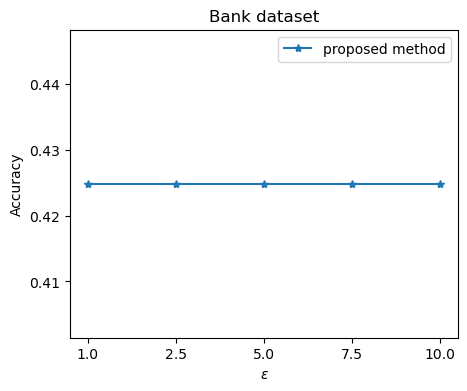

In [34]:
plt.plot(range(len(epsilon)), performance, '-*', label = 'proposed method')
# plt.plot(range(len(epsilon)), np.ones(len(epsilon))*0.89, '-o', label = 'no-DP')
plt.ylabel(r'Accuracy')
plt.xlabel(r'$\epsilon$')
plt.title('Bank dataset')
plt.xticks(range(len(epsilon)), epsilon)
plt.legend()

In [21]:
t = [norm.ppf(0.975, loc=0, scale=i*clip) for i in noise_scale]
def bound(t, clip):
    return 0.1*(2*clip+2*t)/2
bd = []
for i, n in enumerate(t):
    bd.append(bound(n, 0.04))

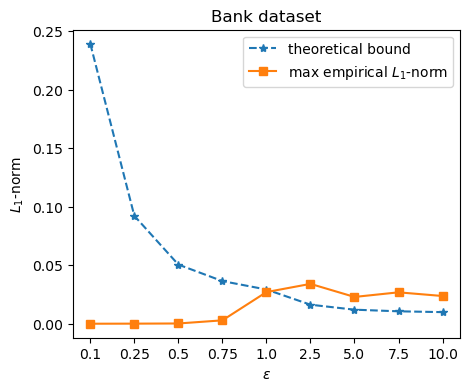

In [22]:
max_deviation = []
for ns in noise_scale:
    num_file = 0
    dev = 0
    for i, file in enumerate(file_name):
        if ('bank_' in file) and ('sigma_{}'.format(ns) in file) and ('clean_' not in file) and ('alg1_' not in file) and ('fair_' not in file):
            # print(file)
            with open('{}{}'.format(file_path,file), 'rb') as f:
                res = pickle.load(f)
                # print(res.keys())
                dev += max(res['male_norm'][-1], res['female_norm'][-1])
                num_file += 1
    max_deviation.append(dev/num_file)
# eps = [0.5, 1.0, 2.0, 5.0]
plt.plot(range(len(epsilon)), bd, '--*', label='theoretical bound')
# plt.plot(range(len(epsilon)), new_bd, '--*', label='new bound')
plt.plot(range(len(epsilon)), max_deviation, '-s', label=r'max empirical $L_1$-norm')
plt.ylabel(r'$L_1$-norm')
plt.xlabel(r'$\epsilon$')
plt.title('Bank dataset')
plt.xticks(range(len(epsilon)), epsilon)
plt.legend()

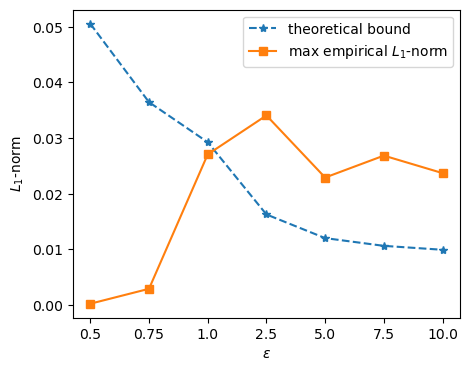

In [23]:
# eps = [0.5, 1.0, 2.0, 5.0]
plt.plot(range(len(epsilon)-2), bd[2:], '--*', label='theoretical bound')
# plt.plot(range(len(epsilon)-2), new_bd[2:], '--*', label='new bound')
plt.plot(range(len(epsilon)-2), max_deviation[2:], '-s', label=r'max empirical $L_1$-norm')
plt.ylabel(r'$L_1$-norm')
plt.xlabel(r'$\epsilon$')
plt.xticks(range(len(epsilon)-2), epsilon[2:])
plt.legend()

## Stroke

In [37]:
noise_scale = [45.0, 16.875, 8.90625, 6.171875, 4.8046875, 2.236328125, 1.3671875, 1.0791015625, 0.93292236328125] 
epsilon = [0.1, 0.25, 0.5, 0.75, 1.0, 2.5, 5.0, 7.5, 10.0]

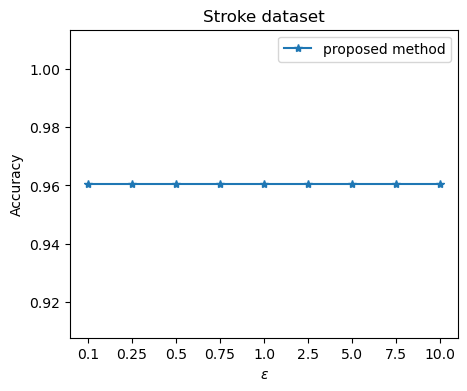

In [38]:
performance = []
for ns in noise_scale:
    num_file = 0
    test_acc = 0
    for i, file in enumerate(file_name):
        if ('stroke_' in file) and ('sigma_{}'.format(ns) in file) and ('proposed_' in file):
            with open('{}{}'.format(file_path,file), 'rb') as f:
                res = pickle.load(f)
                test_acc += res['test_history_acc'][-1]
                num_file += 1
    performance.append(test_acc/num_file)

plt.plot(range(len(epsilon)), performance, '-*', label = 'proposed method')
# plt.plot(range(len(epsilon)), np.ones(len(epsilon))*0.964, '-o', label = 'no-DP')
plt.ylabel(r'Accuracy')
plt.xlabel(r'$\epsilon$')
plt.title('Stroke dataset')
plt.xticks(range(len(epsilon)), epsilon)
plt.legend()

In [26]:
t = [norm.ppf(0.975, loc=0, scale=i*clip) for i in noise_scale]
def bound(t, clip):
    return 0.1*(2*clip+2*t)/2
bd = []
for i, n in enumerate(t):
    bd.append(bound(n, 0.04))

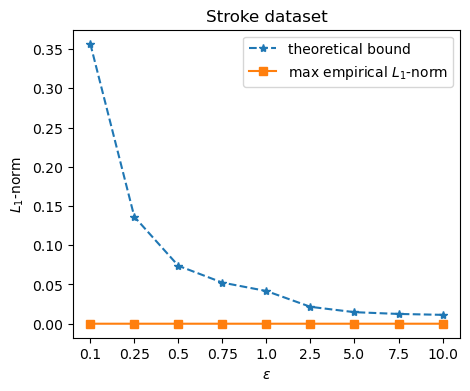

In [27]:
max_deviation = []
for ns in noise_scale:
    num_file = 0
    dev = 0
    for i, file in enumerate(file_name):
        if ('stroke_' in file) and ('sigma_{}'.format(ns) in file) and ('proposed_' in file):
            with open('{}{}'.format(file_path,file), 'rb') as f:
                res = pickle.load(f)
                # print(res.keys())
                dev += max(res['male_norm'][-1], res['female_norm'][-1])
                num_file += 1
    max_deviation.append(dev/num_file)
# eps = [0.5, 1.0, 2.0, 5.0]
plt.plot(range(len(epsilon)), bd, '--*', label='theoretical bound')
# plt.plot(range(len(epsilon)), new_bd, '--*', label='new bound')
plt.plot(range(len(epsilon)), max_deviation, '-s', label=r'max empirical $L_1$-norm')
plt.ylabel(r'$L_1$-norm')
plt.xlabel(r'$\epsilon$')
plt.title('Stroke dataset')
plt.xticks(range(len(epsilon)), epsilon)
plt.legend()

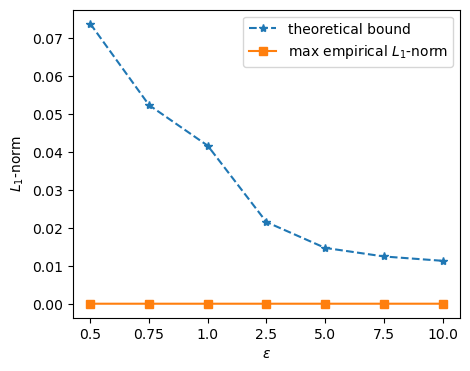

In [28]:
# eps = [0.5, 1.0, 2.0, 5.0]
plt.plot(range(len(epsilon)-2), bd[2:], '--*', label='theoretical bound')
# plt.plot(range(len(epsilon)-2), new_bd[2:], '--*', label='new bound')
plt.plot(range(len(epsilon)-2), max_deviation[2:], '-s', label=r'max empirical $L_1$-norm')
plt.ylabel(r'$L_1$-norm')
plt.xlabel(r'$\epsilon$')
plt.xticks(range(len(epsilon)-2), epsilon[2:])
plt.legend()

# Compare

## Adult

In [9]:
noise_scale = [30.0, 11.25, 5.9375, 4.140625, 3.2421875, 1.5771484375, 1.0302734375, 0.8514404296875, 0.758056640625] 
epsilon = [0.1, 0.25, 0.5, 0.75, 1.0, 2.5, 5.0, 7.5, 10.0]

t = [norm.ppf(0.975, loc=0, scale=i*clip) for i in noise_scale]
def bound(t, clip):
    return 0.1*(2*clip+2*t)/2
bd = []
for i, n in enumerate(t):
    bd.append(bound(n, 0.04))

In [10]:
with open('results/dict/adult_fair_fold_0_sigma_3.2421875_C_0.04_24112022_73515.pkl', 'rb') as f:
    run_fair_dict = pickle.load(f)
with open('results/dict/adult_proposed_fold_0_sigma_3.2421875_C_0.04_23112022_20756.pkl', 'rb') as f:
    run_proposed_dict = pickle.load(f)
with open('results/dict/adult_alg1_fold_0_sigma_3.2421875_C_0.04_24112022_73538.pkl', 'rb') as f:
    run_alg1_dict = pickle.load(f)

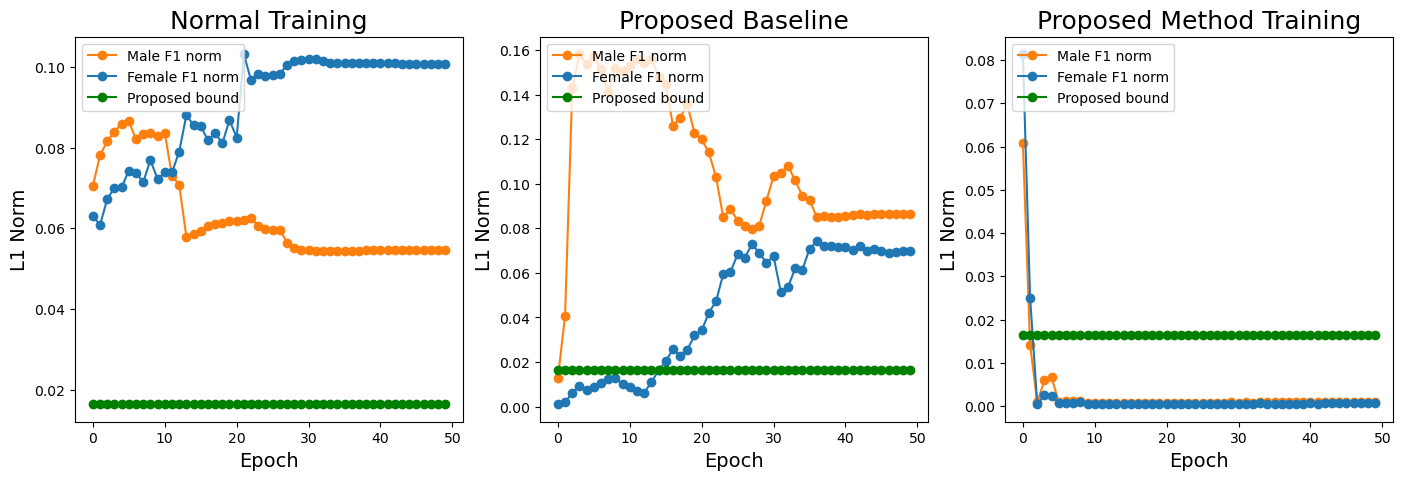

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(17,5))
b = bd[5]
axs[0].plot(
    np.arange(len(run_fair_dict['male_norm'])),
    run_fair_dict['male_norm'],
    '-o',
    label='Male F1 norm',
    color='#ff7f0e'
)

axs[0].plot(
    np.arange(len(run_fair_dict['female_norm'])),
    run_fair_dict['female_norm'],
    '-o',
    label='Female F1 norm',
    color='#1f77b4'
)

axs[0].plot(
    np.arange(len(run_fair_dict['female_norm'])),
    np.ones(len(run_fair_dict['female_norm']))*b,
    '-o',
    label='Proposed bound',
    color='green'
)

axs[0].set_ylabel('L1 Norm', size=14)
axs[0].set_xlabel('Epoch', size=14)
axs[0].set_title(f'Normal Training',size=18)
axs[0].legend()

axs[1].plot(
    np.arange(len(run_alg1_dict['male_norm'])),
    run_alg1_dict['male_norm'],
    '-o',
    label='Male F1 norm',
    color='#ff7f0e'
)

axs[1].plot(
    np.arange(len(run_alg1_dict['female_norm'])),
    run_alg1_dict['female_norm'],
    '-o',
    label='Female F1 norm',
    color='#1f77b4'
)

axs[1].plot(
    np.arange(len(run_alg1_dict['female_norm'])),
    np.ones(len(run_alg1_dict['female_norm']))*b,
    '-o',
    label='Proposed bound',
    color='green'
)

axs[1].set_ylabel('L1 Norm', size=14)
axs[1].set_xlabel('Epoch', size=14)
axs[1].set_title(f'Proposed Baseline',size=18)
axs[1].legend(loc=2)

axs[2].plot(
    np.arange(len(run_proposed_dict['male_norm'])),
    run_proposed_dict['male_norm'],
    '-o',
    label='Male F1 norm',
    color='#ff7f0e'
)

axs[2].plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    run_proposed_dict['female_norm'],
    '-o',
    label='Female F1 norm',
    color='#1f77b4'
)

axs[2].plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    np.ones(len(run_proposed_dict['female_norm']))*b,
    '-o',
    label='Proposed bound',
    color='green'
)

axs[2].set_ylabel('L1 Norm', size=14)
axs[2].set_xlabel('Epoch', size=14)
axs[2].set_title(f'Proposed Method Training',size=18)
axs[2].legend(loc=2)

Text(0, 0.5, 'L1 norm')

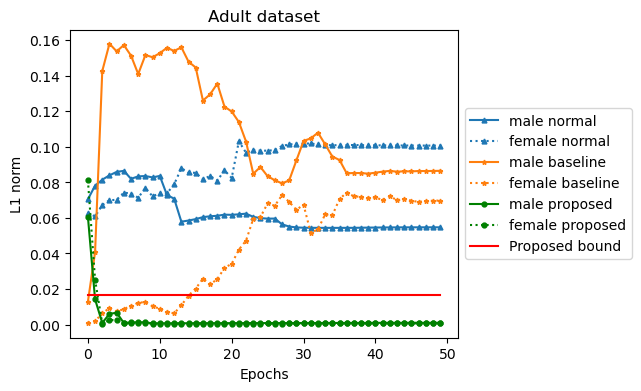

In [12]:
marksize = 3.5
plt.plot(
    np.arange(len(run_fair_dict['male_norm'])),
    run_fair_dict['male_norm'],
    '-^',
    markersize=marksize,
    label='male normal',
    color='#1f77b4'
)

plt.plot(
    np.arange(len(run_fair_dict['female_norm'])),
    run_fair_dict['female_norm'],
    ':^',
    markersize=marksize,
    label='female normal',
    color='#1f77b4'
)

plt.plot(
    np.arange(len(run_alg1_dict['male_norm'])),
    run_alg1_dict['male_norm'],
    '-*',
    markersize=marksize,
    label='male baseline',
    color='#ff7f0e'
)

plt.plot(
    np.arange(len(run_alg1_dict['female_norm'])),
    run_alg1_dict['female_norm'],
    ':*',
    markersize=marksize,
    label='female baseline',
    color='#ff7f0e'
)

plt.plot(
    np.arange(len(run_proposed_dict['male_norm'])),
    run_proposed_dict['male_norm'],
    '-o',
    markersize=marksize,
    label='male proposed',
    color='green'
)

plt.plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    run_proposed_dict['female_norm'],
    ':o',
    markersize=marksize,
    label='female proposed',
    color='green'
)

plt.plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    np.ones(len(run_proposed_dict['female_norm']))*b,
    '-',
    label='Proposed bound',
    color='red'
)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Epochs')
plt.title('Adult dataset')
plt.ylabel('L1 norm')

#ff7f0e
# plt.plot(
#     np.arange(len(run_fair_dict['female_norm'])),
#     np.ones(len(run_fair_dict['female_norm']))*bound,
#     '-o',
#     label='Proposed bound',
#     color='green'

## Bank

In [13]:
noise_scale = [30.0, 11.25, 5.9375, 4.140625, 3.22265625, 1.5673828125, 1.025390625, 0.8477783203125, 0.75531005859375] 
epsilon = [0.1, 0.25, 0.5, 0.75, 1.0, 2.5, 5.0, 7.5, 10.0]

t = [norm.ppf(0.975, loc=0, scale=i*clip) for i in noise_scale]
def bound(t, clip):
    return 0.1*(2*clip+2*t)/2
bd = []
for i, n in enumerate(t):
    bd.append(bound(n, 0.04))

In [42]:
with open('results/dict/bank_fair_fold_0_sigma_3.22265625_C_0.04_24112022_73330.pkl', 'rb') as f:
    run_fair_dict = pickle.load(f)
with open('results/dict/bank_proposed_fold_0_sigma_3.22265625_C_0.04_23112022_18149.pkl', 'rb') as f:
    run_proposed_dict = pickle.load(f)
with open('results/dict/bank_alg1_fold_0_sigma_3.22265625_C_0.04_24112022_73319.pkl', 'rb') as f:
    run_alg1_dict = pickle.load(f)

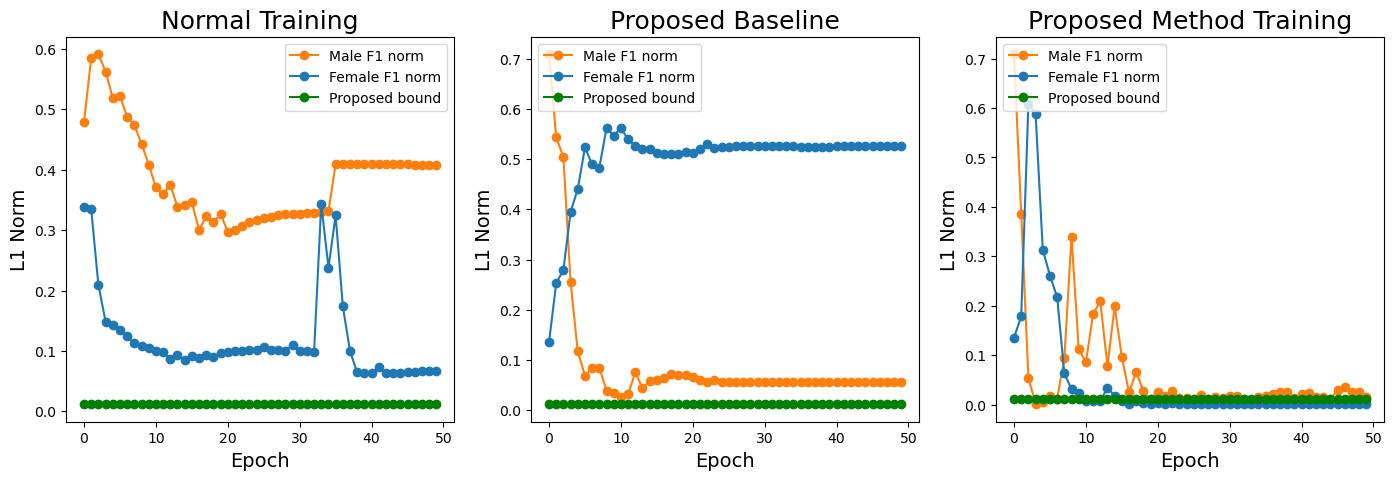

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(17,5))
b = bd[4]
axs[0].plot(
    np.arange(len(run_fair_dict['male_norm'])),
    run_fair_dict['male_norm'],
    '-o',
    label='Male F1 norm',
    color='#ff7f0e'
)

axs[0].plot(
    np.arange(len(run_fair_dict['female_norm'])),
    run_fair_dict['female_norm'],
    '-o',
    label='Female F1 norm',
    color='#1f77b4'
)

axs[0].plot(
    np.arange(len(run_fair_dict['female_norm'])),
    np.ones(len(run_fair_dict['female_norm']))*b,
    '-o',
    label='Proposed bound',
    color='green'
)

axs[0].set_ylabel('L1 Norm', size=14)
axs[0].set_xlabel('Epoch', size=14)
axs[0].set_title(f'Normal Training',size=18)
axs[0].legend()

axs[1].plot(
    np.arange(len(run_alg1_dict['male_norm'])),
    run_alg1_dict['male_norm'],
    '-o',
    label='Male F1 norm',
    color='#ff7f0e'
)

axs[1].plot(
    np.arange(len(run_alg1_dict['female_norm'])),
    run_alg1_dict['female_norm'],
    '-o',
    label='Female F1 norm',
    color='#1f77b4'
)

axs[1].plot(
    np.arange(len(run_alg1_dict['female_norm'])),
    np.ones(len(run_alg1_dict['female_norm']))*b,
    '-o',
    label='Proposed bound',
    color='green'
)

axs[1].set_ylabel('L1 Norm', size=14)
axs[1].set_xlabel('Epoch', size=14)
axs[1].set_title(f'Proposed Baseline',size=18)
axs[1].legend(loc=2)

axs[2].plot(
    np.arange(len(run_proposed_dict['male_norm'])),
    run_proposed_dict['male_norm'],
    '-o',
    label='Male F1 norm',
    color='#ff7f0e'
)

axs[2].plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    run_proposed_dict['female_norm'],
    '-o',
    label='Female F1 norm',
    color='#1f77b4'
)

axs[2].plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    np.ones(len(run_proposed_dict['female_norm']))*b,
    '-o',
    label='Proposed bound',
    color='green'
)

axs[2].set_ylabel('L1 Norm', size=14)
axs[2].set_xlabel('Epoch', size=14)
axs[2].set_title(f'Proposed Method Training',size=18)
axs[2].legend(loc=2)

Text(0, 0.5, 'L1 norm')

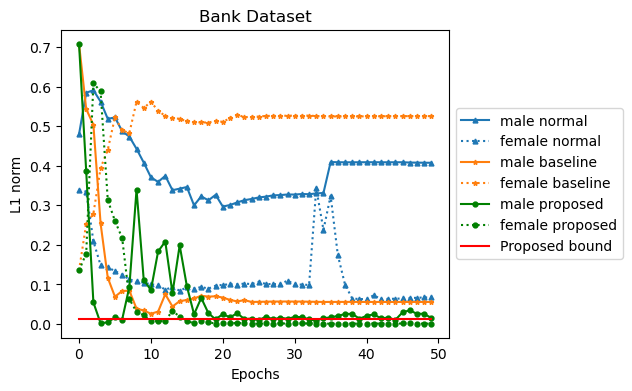

In [45]:
marksize = 3.5
plt.plot(
    np.arange(len(run_fair_dict['male_norm'])),
    run_fair_dict['male_norm'],
    '-^',
    markersize=marksize,
    label='male normal',
    color='#1f77b4'
)

plt.plot(
    np.arange(len(run_fair_dict['female_norm'])),
    run_fair_dict['female_norm'],
    ':^',
    markersize=marksize,
    label='female normal',
    color='#1f77b4'
)

plt.plot(
    np.arange(len(run_alg1_dict['male_norm'])),
    run_alg1_dict['male_norm'],
    '-*',
    markersize=marksize,
    label='male baseline',
    color='#ff7f0e'
)

plt.plot(
    np.arange(len(run_alg1_dict['female_norm'])),
    run_alg1_dict['female_norm'],
    ':*',
    markersize=marksize,
    label='female baseline',
    color='#ff7f0e'
)

plt.plot(
    np.arange(len(run_proposed_dict['male_norm'])),
    run_proposed_dict['male_norm'],
    '-o',
    markersize=marksize,
    label='male proposed',
    color='green'
)

plt.plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    run_proposed_dict['female_norm'],
    ':o',
    markersize=marksize,
    label='female proposed',
    color='green'
)

plt.plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    np.ones(len(run_proposed_dict['female_norm']))*b,
    '-',
    label='Proposed bound',
    color='red'
)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Epochs')
plt.title('Bank Dataset')
plt.ylabel('L1 norm')

#ff7f0e
# plt.plot(
#     np.arange(len(run_fair_dict['female_norm'])),
#     np.ones(len(run_fair_dict['female_norm']))*bound,
#     '-o',
#     label='Proposed bound',
#     color='green'

## Stroke

In [51]:
with open('results/dict/stroke_fair_fold_0_sigma_1.0_C_0.04_23112022_10114.pkl', 'rb') as f:
    run_fair_dict = pickle.load(f)
with open('results/dict/stroke_proposed_fold_0_sigma_1.0_C_0.04_22112022_11713.pkl', 'rb') as f:
    run_proposed_dict = pickle.load(f)
with open('results/dict/stroke_alg1_fold_0_sigma_1.0_C_0.04_23112022_101121.pkl', 'rb') as f:
    run_alg1_dict = pickle.load(f)

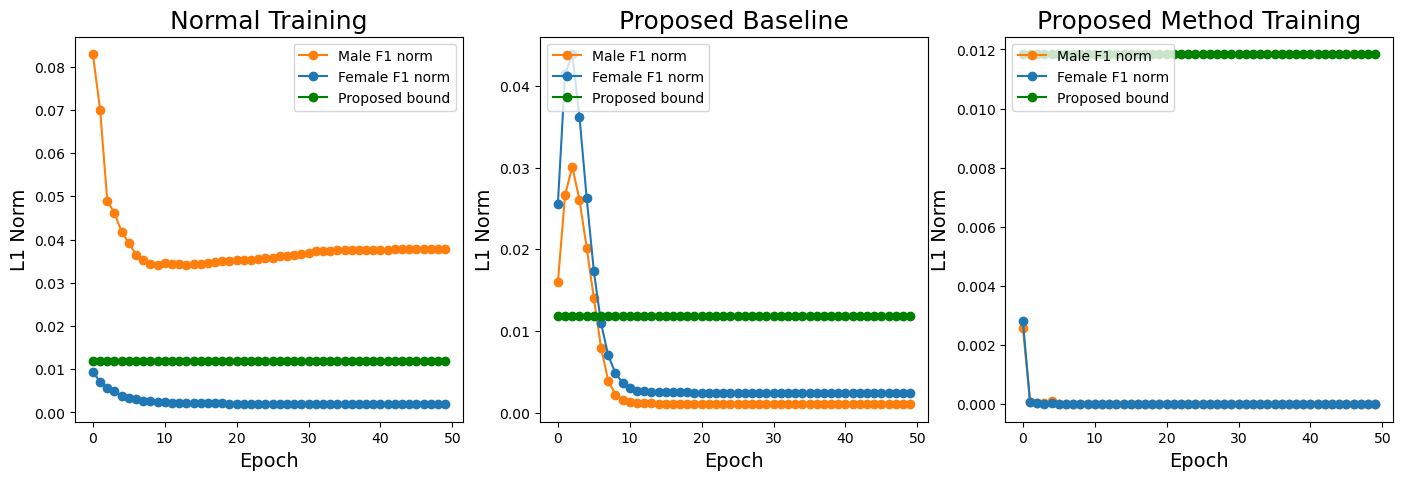

In [52]:
fig, axs = plt.subplots(1, 3, figsize=(17,5))
b = bd[4]
axs[0].plot(
    np.arange(len(run_fair_dict['male_norm'])),
    run_fair_dict['male_norm'],
    '-o',
    label='Male F1 norm',
    color='#ff7f0e'
)

axs[0].plot(
    np.arange(len(run_fair_dict['female_norm'])),
    run_fair_dict['female_norm'],
    '-o',
    label='Female F1 norm',
    color='#1f77b4'
)

axs[0].plot(
    np.arange(len(run_fair_dict['female_norm'])),
    np.ones(len(run_fair_dict['female_norm']))*b,
    '-o',
    label='Proposed bound',
    color='green'
)

axs[0].set_ylabel('L1 Norm', size=14)
axs[0].set_xlabel('Epoch', size=14)
axs[0].set_title(f'Normal Training',size=18)
axs[0].legend()

axs[1].plot(
    np.arange(len(run_alg1_dict['male_norm'])),
    run_alg1_dict['male_norm'],
    '-o',
    label='Male F1 norm',
    color='#ff7f0e'
)

axs[1].plot(
    np.arange(len(run_alg1_dict['female_norm'])),
    run_alg1_dict['female_norm'],
    '-o',
    label='Female F1 norm',
    color='#1f77b4'
)

axs[1].plot(
    np.arange(len(run_alg1_dict['female_norm'])),
    np.ones(len(run_alg1_dict['female_norm']))*b,
    '-o',
    label='Proposed bound',
    color='green'
)

axs[1].set_ylabel('L1 Norm', size=14)
axs[1].set_xlabel('Epoch', size=14)
axs[1].set_title(f'Proposed Baseline',size=18)
axs[1].legend(loc=2)

axs[2].plot(
    np.arange(len(run_proposed_dict['male_norm'])),
    run_proposed_dict['male_norm'],
    '-o',
    label='Male F1 norm',
    color='#ff7f0e'
)

axs[2].plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    run_proposed_dict['female_norm'],
    '-o',
    label='Female F1 norm',
    color='#1f77b4'
)

axs[2].plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    np.ones(len(run_proposed_dict['female_norm']))*b,
    '-o',
    label='Proposed bound',
    color='green'
)

axs[2].set_ylabel('L1 Norm', size=14)
axs[2].set_xlabel('Epoch', size=14)
axs[2].set_title(f'Proposed Method Training',size=18)
axs[2].legend(loc=2)

Text(0, 0.5, 'L1 norm')

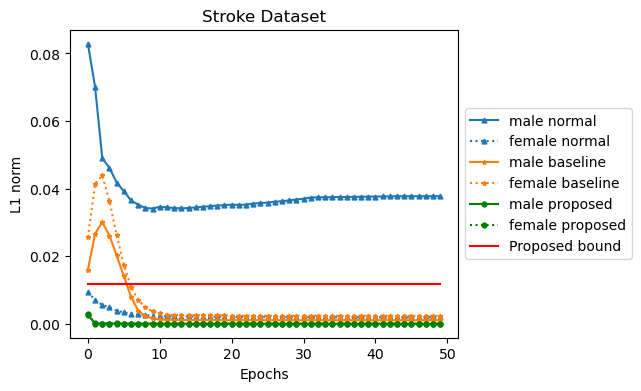

In [53]:
marksize = 3.5
plt.plot(
    np.arange(len(run_fair_dict['male_norm'])),
    run_fair_dict['male_norm'],
    '-^',
    markersize=marksize,
    label='male normal',
    color='#1f77b4'
)

plt.plot(
    np.arange(len(run_fair_dict['female_norm'])),
    run_fair_dict['female_norm'],
    ':^',
    markersize=marksize,
    label='female normal',
    color='#1f77b4'
)

plt.plot(
    np.arange(len(run_alg1_dict['male_norm'])),
    run_alg1_dict['male_norm'],
    '-*',
    markersize=marksize,
    label='male baseline',
    color='#ff7f0e'
)

plt.plot(
    np.arange(len(run_alg1_dict['female_norm'])),
    run_alg1_dict['female_norm'],
    ':*',
    markersize=marksize,
    label='female baseline',
    color='#ff7f0e'
)

plt.plot(
    np.arange(len(run_proposed_dict['male_norm'])),
    run_proposed_dict['male_norm'],
    '-o',
    markersize=marksize,
    label='male proposed',
    color='green'
)

plt.plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    run_proposed_dict['female_norm'],
    ':o',
    markersize=marksize,
    label='female proposed',
    color='green'
)

plt.plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    np.ones(len(run_proposed_dict['female_norm']))*b,
    '-',
    label='Proposed bound',
    color='red'
)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Epochs')
plt.title('Stroke Dataset')
plt.ylabel('L1 norm')

#ff7f0e
# plt.plot(
#     np.arange(len(run_fair_dict['female_norm'])),
#     np.ones(len(run_fair_dict['female_norm']))*bound,
#     '-o',
#     label='Proposed bound',
#     color='green'

# Others

In [13]:
def new_bound(t, clip):
    return 0.1*(2*clip+t)/2
# bound = 0.001*(2*1 + 8*1**2*1**2)/2

In [15]:
# new_bd = []
# for i, n in enumerate(r):
#     new_bd.append(new_bound(n, 0.04))

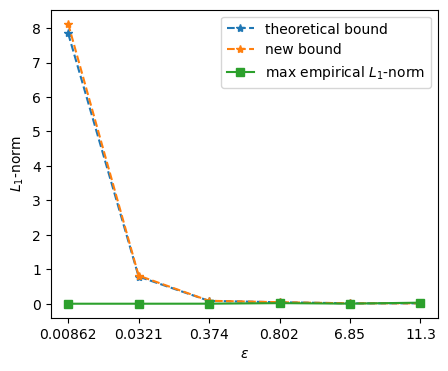

In [36]:
# eps = [0.5, 1.0, 2.0, 5.0]
plt.plot(range(len(epsilon)), bd, '--*', label='theoretical bound')
plt.plot(range(len(epsilon)), new_bd, '--*', label='new bound')
plt.plot(range(len(epsilon)), max_deviation, '-s', label=r'max empirical $L_1$-norm')
plt.ylabel(r'$L_1$-norm')
plt.xlabel(r'$\epsilon$')
plt.xticks(range(len(epsilon)), epsilon)
plt.legend()

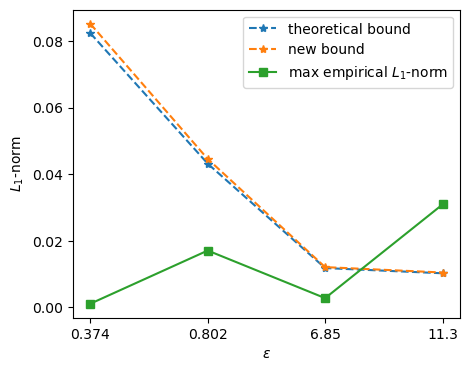

In [37]:
# eps = [0.5, 1.0, 2.0, 5.0]
plt.plot(range(len(epsilon)-2), bd[2:], '--*', label='theoretical bound')
plt.plot(range(len(epsilon)-2), new_bd[2:], '--*', label='new bound')
plt.plot(range(len(epsilon)-2), max_deviation[2:], '-s', label=r'max empirical $L_1$-norm')
plt.ylabel(r'$L_1$-norm')
plt.xlabel(r'$\epsilon$')
plt.xticks(range(len(epsilon)-2), epsilon[2:])
plt.legend()

In [42]:
(0.8067686260057736 + 0.801)/2

0.8038843130028868

In [43]:
performance_ = [0.8031447699772741,
 0.8029605061114182,
 0.8009336035870033,
 0.8028843130028869,
 0.8038843130028868,
 0.8026005773647227]

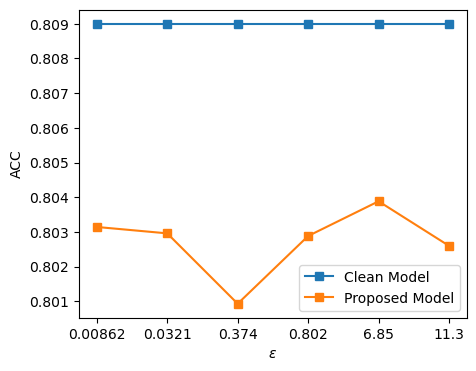

In [44]:
plt.plot(range(len(epsilon)), np.ones(len(epsilon))*0.809, '-s', label=r'Clean Model')
plt.plot(range(len(epsilon)), performance_, '-s', label=r'Proposed Model')
plt.ylabel(r'ACC')
plt.xlabel(r'$\epsilon$')
plt.xticks(range(len(epsilon)), epsilon)
plt.legend()

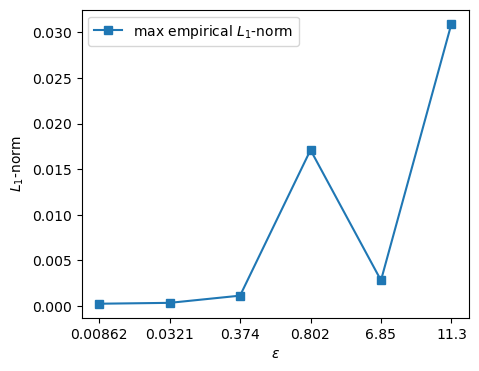

In [21]:
plt.plot(range(len(epsilon)), max_deviation, '-s', label=r'max empirical $L_1$-norm')
plt.ylabel(r'$L_1$-norm')
plt.xlabel(r'$\epsilon$')
plt.xticks(range(len(epsilon)), epsilon)
plt.legend()

In [3]:
with open('results/dict/adult_fair_fold_0_9112022_194819.pkl', 'rb') as f:
    run_fair_dict = pickle.load(f)
with open('results/dict/adult_proposed_fold_0_9112022_195457.pkl', 'rb') as f:
    run_proposed_dict = pickle.load(f)
with open('results/dict/adult_alg1_fold_0_9112022_193928.pkl', 'rb') as f:
    run_alg1_dict = pickle.load(f)

In [4]:
run_fair_dict.keys()

dict_keys(['train_global_history_loss', 'train_male_history_loss', 'train_female_history_loss', 'train_global_history_acc', 'train_male_history_acc', 'train_female_history_acc', 'val_global_history_loss', 'val_male_history_loss', 'val_female_history_loss', 'val_global_history_acc', 'val_male_history_acc', 'val_female_history_acc', 'male_norm', 'female_norm'])

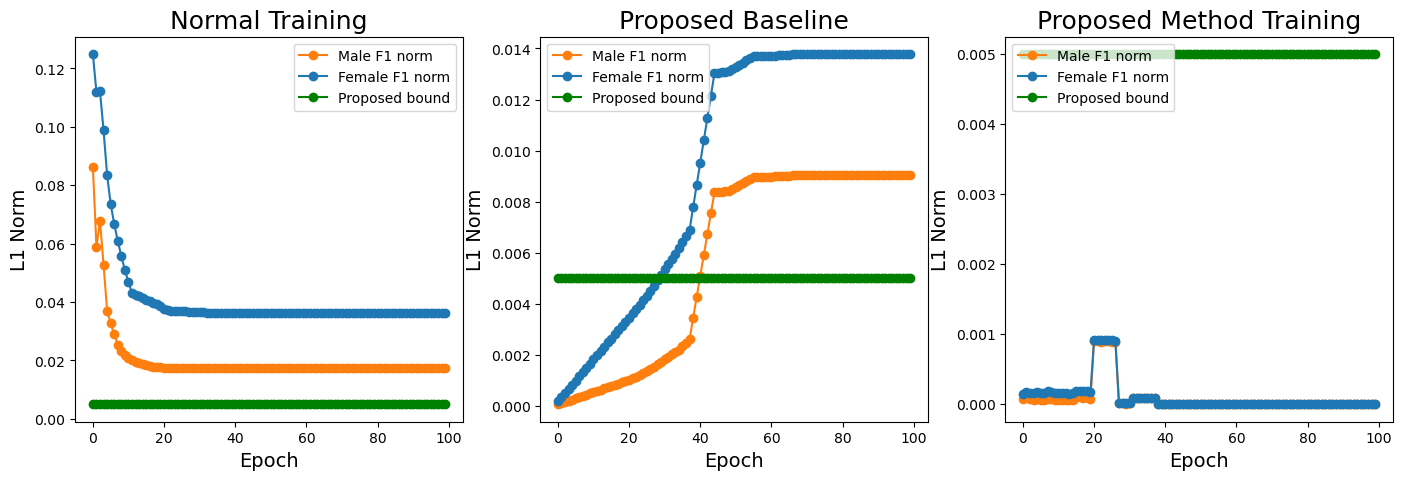

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(17,5))

axs[0].plot(
    np.arange(len(run_fair_dict['male_norm'])),
    run_fair_dict['male_norm'],
    '-o',
    label='Male F1 norm',
    color='#ff7f0e'
)

axs[0].plot(
    np.arange(len(run_fair_dict['female_norm'])),
    run_fair_dict['female_norm'],
    '-o',
    label='Female F1 norm',
    color='#1f77b4'
)

axs[0].plot(
    np.arange(len(run_fair_dict['female_norm'])),
    np.ones(len(run_fair_dict['female_norm']))*bound,
    '-o',
    label='Proposed bound',
    color='green'
)

axs[0].set_ylabel('L1 Norm', size=14)
axs[0].set_xlabel('Epoch', size=14)
axs[0].set_title(f'Normal Training',size=18)
axs[0].legend()

axs[1].plot(
    np.arange(len(run_alg1_dict['male_norm'])),
    run_alg1_dict['male_norm'],
    '-o',
    label='Male F1 norm',
    color='#ff7f0e'
)

axs[1].plot(
    np.arange(len(run_alg1_dict['female_norm'])),
    run_alg1_dict['female_norm'],
    '-o',
    label='Female F1 norm',
    color='#1f77b4'
)

axs[1].plot(
    np.arange(len(run_alg1_dict['female_norm'])),
    np.ones(len(run_alg1_dict['female_norm']))*bound,
    '-o',
    label='Proposed bound',
    color='green'
)

axs[1].set_ylabel('L1 Norm', size=14)
axs[1].set_xlabel('Epoch', size=14)
axs[1].set_title(f'Proposed Baseline',size=18)
axs[1].legend(loc=2)

axs[2].plot(
    np.arange(len(run_proposed_dict['male_norm'])),
    run_proposed_dict['male_norm'],
    '-o',
    label='Male F1 norm',
    color='#ff7f0e'
)

axs[2].plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    run_proposed_dict['female_norm'],
    '-o',
    label='Female F1 norm',
    color='#1f77b4'
)

axs[2].plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    np.ones(len(run_proposed_dict['female_norm']))*bound,
    '-o',
    label='Proposed bound',
    color='green'
)

axs[2].set_ylabel('L1 Norm', size=14)
axs[2].set_xlabel('Epoch', size=14)
axs[2].set_title(f'Proposed Method Training',size=18)
axs[2].legend(loc=2)

Text(0, 0.5, 'L1 norm')

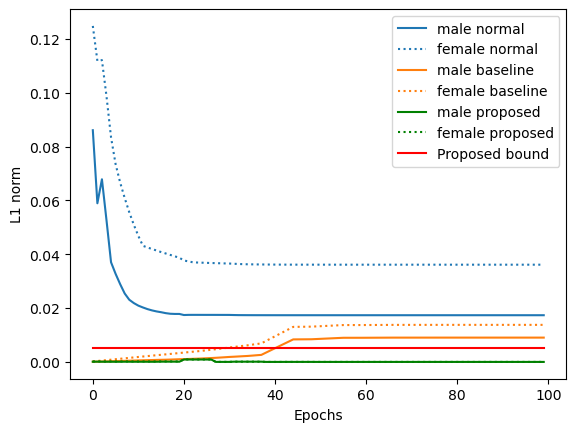

In [17]:
plt.plot(
    np.arange(len(run_fair_dict['male_norm'])),
    run_fair_dict['male_norm'],
    '-',
    label='male normal',
    color='#1f77b4'
)

plt.plot(
    np.arange(len(run_fair_dict['female_norm'])),
    run_fair_dict['female_norm'],
    ':',
    label='female normal',
    color='#1f77b4'
)

plt.plot(
    np.arange(len(run_alg1_dict['male_norm'])),
    run_alg1_dict['male_norm'],
    '-',
    label='male baseline',
    color='#ff7f0e'
)

plt.plot(
    np.arange(len(run_alg1_dict['female_norm'])),
    run_alg1_dict['female_norm'],
    ':',
    label='female baseline',
    color='#ff7f0e'
)

plt.plot(
    np.arange(len(run_proposed_dict['male_norm'])),
    run_proposed_dict['male_norm'],
    '-',
    label='male proposed',
    color='green'
)

plt.plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    run_proposed_dict['female_norm'],
    ':',
    label='female proposed',
    color='green'
)

plt.plot(
    np.arange(len(run_proposed_dict['female_norm'])),
    np.ones(len(run_proposed_dict['female_norm']))*bound,
    '-',
    label='Proposed bound',
    color='red'
)
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('L1 norm')

#ff7f0e
# plt.plot(
#     np.arange(len(run_fair_dict['female_norm'])),
#     np.ones(len(run_fair_dict['female_norm']))*bound,
#     '-o',
#     label='Proposed bound',
#     color='green'

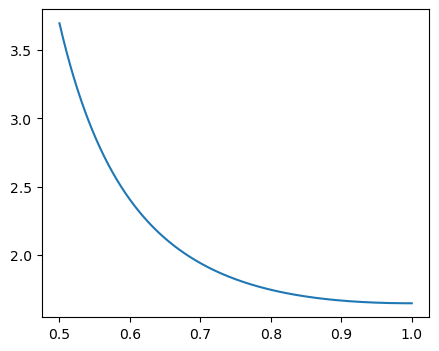

In [38]:
def f(sigma):
    return sigma*np.exp(1/(2*sigma**2))

sig = np.linspace(0.5, 1, 1000)
val = f(sig)
plt.plot(sig, val)

# Test

## Fair

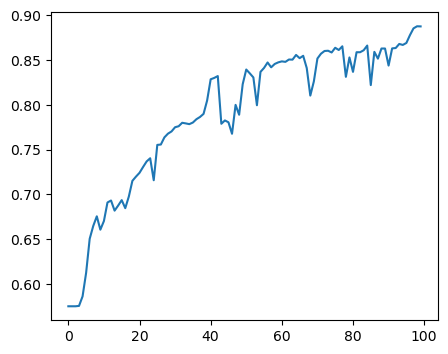

In [6]:
performance = None
num_file = 0
for i, file in enumerate(file_name):
    if ('bank_' in file) and ('fair_' in file):
        # print(file)
        with open('{}{}'.format(file_path,file), 'rb') as f:
            res = pickle.load(f)
            if (type(performance) == type(None)):
                performance = np.array(res['test_history_acc'])
            else:
                performance += np.array(res['test_history_acc'])                     
            num_file += 1
plt.plot(performance/num_file)

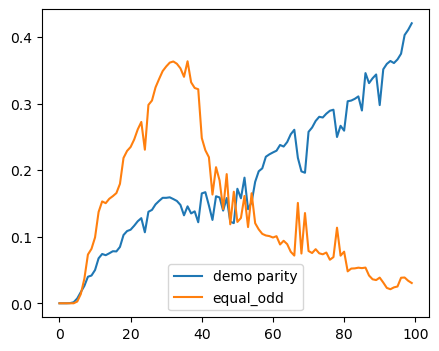

In [7]:
demo_p = None
equal_odd = None
num_file = 0
for i, file in enumerate(file_name):
    if ('bank_' in file) and ('fair_' in file):
        # print(file)
        with open('{}{}'.format(file_path,file), 'rb') as f:
            res = pickle.load(f)
            if (type(demo_p) == type(None)):
                demo_p = np.array(res['demo_parity'][:100])
                equal_odd = np.array(res['equal_odd'][:100])
            else:
                demo_p += np.array(res['demo_parity'][:100])
                equal_odd += np.array(res['equal_odd'][:100])                    
            num_file += 1
plt.plot(demo_p/num_file, label='demo parity')
plt.plot(equal_odd/num_file, label='equal_odd')
plt.legend()

## FairDP

In [4]:
noise_scale = [183.45, 96.0, 21.75, 11.517, 4.3384, 2.83, 2.1743, 1.8079]
epsilon = [0.05, 0.1, 0.5, 1.0, 3.0, 5.0, 7.0, 9.0]

In [5]:
performance_fairdp = []
for ns in noise_scale:
    num_file = 0
    test_acc = 0
    for i, file in enumerate(file_name):
        if ('bank_' in file) and ('sigma_{}'.format(ns) in file) and ('fairdp_track' in file):
            # print(file)
            with open('{}{}'.format(file_path,file), 'rb') as f:
                res = pickle.load(f)
                test_acc += res['test_history_acc'][-1]
                num_file += 1
    performance_fairdp.append(test_acc/num_file)
    
performance_dpsgd = []
for ns in noise_scale:
    num_file = 0
    test_acc = 0
    for i, file in enumerate(file_name):
        if ('bank_' in file) and ('sigma_{}'.format(ns) in file) and ('dpsgd' in file):
            # print(file)
            with open('{}{}'.format(file_path,file), 'rb') as f:
                res = pickle.load(f)
                test_acc += res['test_history_acc'][-1]
                num_file += 1
    performance_dpsgd.append(test_acc/num_file)
    
performance_func = []
for eps in epsilon:
    num_file = 0
    test_acc = 0
    for i, file in enumerate(file_name):
        if ('bank_' in file) and ('eps_{}'.format(eps) in file) and ('submode_func_org' in file):
            # print(file)
            with open('{}{}'.format(file_path,file), 'rb') as f:
                res = pickle.load(f)
                test_acc += res['test_history_acc'][-1]
                num_file += 1
    performance_func.append(test_acc/num_file)

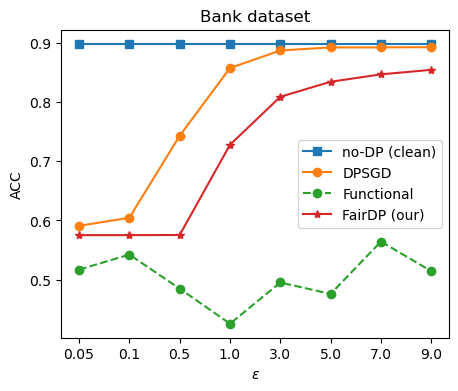

In [6]:
plt.plot(range(len(epsilon)), np.ones(len(epsilon))*0.8986206896551724, '-s', label = 'no-DP (clean)')
plt.plot(range(len(epsilon)), performance_dpsgd, '-o', label = 'DPSGD')
plt.plot(range(len(epsilon)), performance_func, '--o', label = 'Functional')
plt.plot(range(len(epsilon)), performance_fairdp, '-*', label = 'FairDP (our)')

# plt.plot(range(len(epsilon)), equal_odd, '-*', label = 'equal_odd')
# plt.plot(range(len(epsilon)), dis_imp, '-*', label = 'dis_imp')
# plt.plot(range(len(epsilon)), np.ones(len(epsilon))*0.964, '-o', label = 'no-DP')
plt.ylabel('ACC')
plt.xlabel(r'$\epsilon$')
plt.title('Bank dataset')
plt.xticks(range(len(epsilon)), epsilon)
plt.legend()

In [7]:
import torch
from torch import nn

/Users/khangtran/anaconda3/envs/torch/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
class NormLogit(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NormLogit, self).__init__()
        self.layer_1 = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        norm = torch.norm(x, dim=-1, keepdim=True).repeat(1, x.size(dim=-1)) + 1e-16
        x = torch.div(x, norm)
        x = self.layer_1(x)
        out = torch.nn.functional.sigmoid(x)
        return out

In [9]:
import torch
import numpy as np
from torch.utils.data import Dataset

class Data(Dataset):
    def __init__(self, X, y, ismale):
        self.ismale = torch.from_numpy(ismale)
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.float32))
        self.len = self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index], self.ismale[index]

    def __len__(self):
        return self.len

In [10]:
df = pd.read_csv('Data/Bank/formated_bank.csv')
# df['bias'] = np.ones(df.shape[0])
feature_cols = list(df.columns)
feature_cols.remove('y')
feature_cols.remove('z')
feature_cols.remove('label')
feature_cols.remove('is_train')
feature_cols.remove('intercept')
label = 'y'
test_df = df[df['is_train'] == 0].reset_index(drop=True).sample(frac = 1)
male_df = test_df[test_df['z'] == 1]
female_df = test_df[test_df['z'] == 0]

In [11]:
female_df['z'].value_counts()

0    1333
Name: z, dtype: int64

In [12]:
print(male_df.shape, female_df.shape)

(117, 21) (1333, 21)


In [13]:
test_df['z'].value_counts()

0    1333
1     117
Name: z, dtype: int64

In [14]:
male_dataset = Data(
    X=male_df[feature_cols].values,
    y=male_df['y'].values,
    ismale=male_df['z'].values
)

female_dataset = Data(
    X=female_df[feature_cols].values,
    y=female_df['y'].values,
    ismale=female_df['z'].values
)
print(len(male_dataset), len(female_dataset))

117 1333


In [15]:
from torch.utils.data import DataLoader

male_loader = DataLoader(
    male_dataset,
    batch_size=32,
    num_workers=4,
    shuffle=False,
    pin_memory=True,
    drop_last=False,
)

female_loader = DataLoader(
    female_dataset,
    batch_size=32,
    num_workers=4,
    shuffle=False,
    pin_memory=True,
    drop_last=False,
)
print(len(male_loader), len(female_loader))

4 42


In [26]:
model_male = NormLogit(16, 2, 1)
model_female = NormLogit(16, 2, 1)
global_model = NormLogit(16, 2,1)
global_model_ = NormLogit(16, 2,1)

In [27]:
model_path = 'results/models/'
model_name = os.listdir(model_path)
ns_date = {}
for ns in noise_scale:
    date = []
    for i, file in enumerate(model_name):
        if ('bank_' in file) and ('sigma_{}'.format(ns) in file) and ('fairdp_track' in file):
            date.append('_'.join(file.split('_')[-2:]))
    ns_date[ns] = set(date)

In [28]:
def disperate_impact(male_loader, female_loader, global_model, male_model, female_model, num_male, num_female, device = 'cpu'):
    global_model.to(device)
    male_model.to(device)
    female_model.to(device)

    glob_male_out = []
    glob_female_out = []
    male_outputs = []
    female_outputs = []

    global_model.eval()
    male_model.eval()
    female_model.eval()
    with torch.no_grad():

        for bi, d in enumerate(male_loader):
            
            features, _, ismale = d
            # print(ismale) 
            
            features = features.to(device, dtype=torch.float)

            glob_out = global_model(features)
            male_out = male_model(features)

            glob_out = torch.squeeze(glob_out, dim=-1)
            glob_out = glob_out.cpu().detach().numpy()
            glob_male_out.extend(glob_out)

            male_out = torch.squeeze(male_out, dim=-1)
            male_out = male_out.cpu().detach().numpy()
            male_outputs.extend(male_out)

        for bi, d in enumerate(female_loader):
            features, _, ismale = d
            # print(ismale)
            features = features.to(device, dtype=torch.float)

            glob_out = global_model(features)
            female_out = female_model(features)

            glob_out = torch.squeeze(glob_out, dim=-1)
            glob_out = glob_out.cpu().detach().numpy()
            glob_female_out.extend(glob_out)

            female_out = torch.squeeze(female_out, dim=-1)
            female_out = female_out.cpu().detach().numpy()
            female_outputs.extend(female_out)

    male_outputs = np.array(male_outputs)
    glob_male_out = np.array(glob_male_out)
    female_outputs = np.array(female_outputs)
    glob_female_out = np.array(glob_female_out)

    male_norm = np.sum(np.abs(male_outputs - glob_male_out))
    female_norm = np.sum(np.abs(female_outputs - glob_female_out))
    return male_norm / num_male, female_norm / num_female

In [31]:
disp_imp_fairdp = []
disp_imp_dpsgd = []
for ns in noise_scale:
    date = ns_date[ns]
    disp = 0
    disp_dpsgd = 0
    num_file = 0
    for d in date:
        model_female.load_state_dict(torch.load('results/models/female_bank_fairdp_track_fold_0_sigma_{}_C_2.0_epochs_1250_{}'.format(ns, d), map_location='cpu'))
        model_male.load_state_dict(torch.load('results/models/male_bank_fairdp_track_fold_0_sigma_{}_C_2.0_epochs_1250_{}'.format(ns, d), map_location='cpu'))
        global_model.load_state_dict(torch.load('results/models/bank_fairdp_track_fold_0_sigma_{}_C_2.0_epochs_1250_{}'.format(ns, d), map_location='cpu'))
        male_norm, female_norm = disperate_impact(male_loader=male_loader, female_loader=female_loader, global_model = global_model, male_model = model_male, female_model = model_female, num_male=117, num_female=1333)
        disp += max(male_norm, female_norm)
        disp_ = 0
        num_file_ = 0
        for file in model_name:
            if ('dpsgd' in file) and ('sigma_{}'.format(ns) in file):
                global_model_.load_state_dict(torch.load('results/models/{}'.format(file), map_location='cpu'))
                male_norm, female_norm = disperate_impact(male_loader=male_loader, female_loader=female_loader, global_model = global_model_, male_model = model_male, female_model = model_female, num_male=117, num_female=1333)
                disp_ += max(male_norm, female_norm)
                num_file_ += 1
        disp_dpsgd += disp_/num_file_    
        num_file += 1
    # print(disp/num_file)
    disp_imp_fairdp.append(disp/num_file)
    disp_imp_dpsgd.append(disp_dpsgd/num_file)

/Users/khangtran/anaconda3/envs/torch/lib/python3.7/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


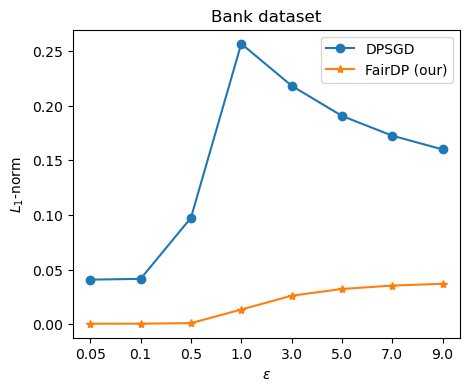

In [34]:
plt.plot(range(len(epsilon)), disp_imp_dpsgd, '-o', label = 'DPSGD')
# plt.plot(range(len(epsilon)), performance_func, '--o', label = 'Functional')
plt.plot(range(len(epsilon)), disp_imp_fairdp, '-*', label = 'FairDP (our)')

# plt.plot(range(len(epsilon)), equal_odd, '-*', label = 'equal_odd')
# plt.plot(range(len(epsilon)), dis_imp, '-*', label = 'dis_imp')
# plt.plot(range(len(epsilon)), np.ones(len(epsilon))*0.964, '-o', label = 'no-DP')
plt.ylabel(r'$L_1$-norm')
plt.xlabel(r'$\epsilon$')
plt.title('Bank dataset')
plt.xticks(range(len(epsilon)), epsilon)
plt.legend()

# Test 03/12/2022

In [17]:
performance = 0
num_file = 0
for i, file in enumerate(file_name):
    if ('bank_' in file) and ('fairdp_track' in file):
        # print(file)
        with open('{}{}'.format(file_path,file), 'rb') as f:
            res = pickle.load(f)
            print(res.keys())
            break
            performance += res['best_test']
            num_file += 1
            # print(res['best_test'])
            # if (type(performance) == type(None)):
            #     performance = np.array(res['best_test'])
            # else:
            #     performance += np.array(res['best_test'])                     
            # num_file += 1
print(performance/num_file)
# plt.plot(performance/num_file)

dict_keys(['train_history_loss', 'train_history_acc', 'val_history_loss', 'val_history_acc', 'demo_parity', 'equal_odd', 'disp_imp', 'test_history_loss', 'test_history_acc', 'best_test', 'best_demo_parity', 'best_equal_odd', 'best_disp_imp', 'male_norm', 'female_norm', 'male_std', 'female_std'])


ZeroDivisionError: division by zero

In [13]:
# noise_scale = [200.0, 29.0, 15.2, 3.5, 1.95, 0.75, 0.6]
# epsilon = [0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0]

In [10]:
performance = []
for ns in noise_scale:
    num_file = 0
    test_acc = 0
    for i, file in enumerate(file_name):
        if ('bank_' in file) and ('sigma_{}'.format(ns) in file) and ('fairdp_track' in file):
            # print(file)
            with open('{}{}'.format(file_path,file), 'rb') as f:
                res = pickle.load(f)
                test_acc += res['best_test']
                num_file += 1
    performance.append(test_acc/num_file)
    
demo_parity = []
for ns in noise_scale:
    num_file = 0
    dev = 0
    for i, file in enumerate(file_name):
        if ('bank_' in file) and ('sigma_{}'.format(ns) in file) and ('fairdp_track' in file):
            with open('{}{}'.format(file_path,file), 'rb') as f:
                res = pickle.load(f)
                # print(res.keys())
                dev += res['best_demo_parity']
                num_file += 1
    demo_parity.append(dev/num_file)
    
equal_odd = []
for ns in noise_scale:
    num_file = 0
    dev = 0
    for i, file in enumerate(file_name):
        if ('bank_' in file) and ('sigma_{}'.format(ns) in file) and ('fairdp_track' in file):
            with open('{}{}'.format(file_path,file), 'rb') as f:
                res = pickle.load(f)
                # print(res.keys())
                dev += res['best_equal_odd']
                num_file += 1
    equal_odd.append(dev/num_file)

dis_imp = []
for ns in noise_scale:
    num_file = 0
    dev = 0
    for i, file in enumerate(file_name):
        if ('bank_' in file) and ('sigma_{}'.format(ns) in file) and ('fairdp_track' in file):
            with open('{}{}'.format(file_path,file), 'rb') as f:
                res = pickle.load(f)
                # print(res.keys())
                dev += res['best_disp_imp']
                num_file += 1
    dis_imp.append(dev/num_file)

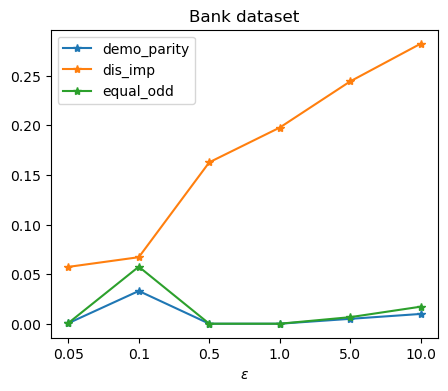

In [11]:
plt.plot(range(len(epsilon)), demo_parity, '-*', label = 'demo_parity')
plt.plot(range(len(epsilon)), dis_imp, '-*', label = 'dis_imp')
plt.plot(range(len(epsilon)), equal_odd, '-*', label = 'equal_odd')
# plt.plot(range(len(epsilon)), np.ones(len(epsilon))*0.964, '-o', label = 'no-DP')
# plt.ylabel(r'$L_1$-norm')
plt.xlabel(r'$\epsilon$')
plt.title('Bank dataset')
plt.xticks(range(len(epsilon)), epsilon)
plt.legend()

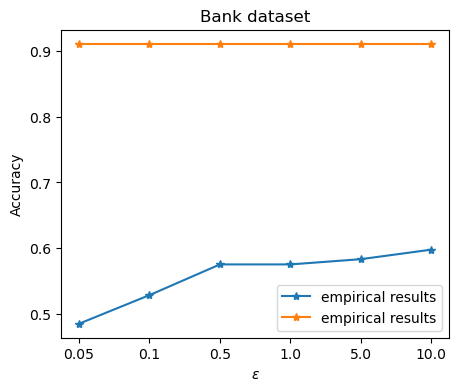

In [12]:
plt.plot(range(len(epsilon)), performance, '-*', label = 'empirical results')
plt.plot(range(len(epsilon)), np.ones(len(epsilon))*0.9113793103448277, '-*', label = 'empirical results')
# plt.plot(range(len(epsilon)), np.ones(len(epsilon))*0.964, '-o', label = 'no-DP')
plt.ylabel(r'Accuracy')
plt.xlabel(r'$\epsilon$')
plt.title('Bank dataset')
plt.xticks(range(len(epsilon)), epsilon)
plt.legend()

In [16]:
dis_imp = []
for ns in noise_scale:
    num_file = 0
    dev = 0
    for i, file in enumerate(file_name):
        if ('bank_' in file) and ('sigma_{}'.format(ns) in file) and ('fairdp_track' in file):
            with open('{}{}'.format(file_path,file), 'rb') as f:
                res = pickle.load(f)
                # print(res.keys())
                # break
                print(np.array(res['male_std']).shape)
                break
                num_file += 1
    dis_imp.append(dev/num_file)

(1250,)


ZeroDivisionError: division by zero

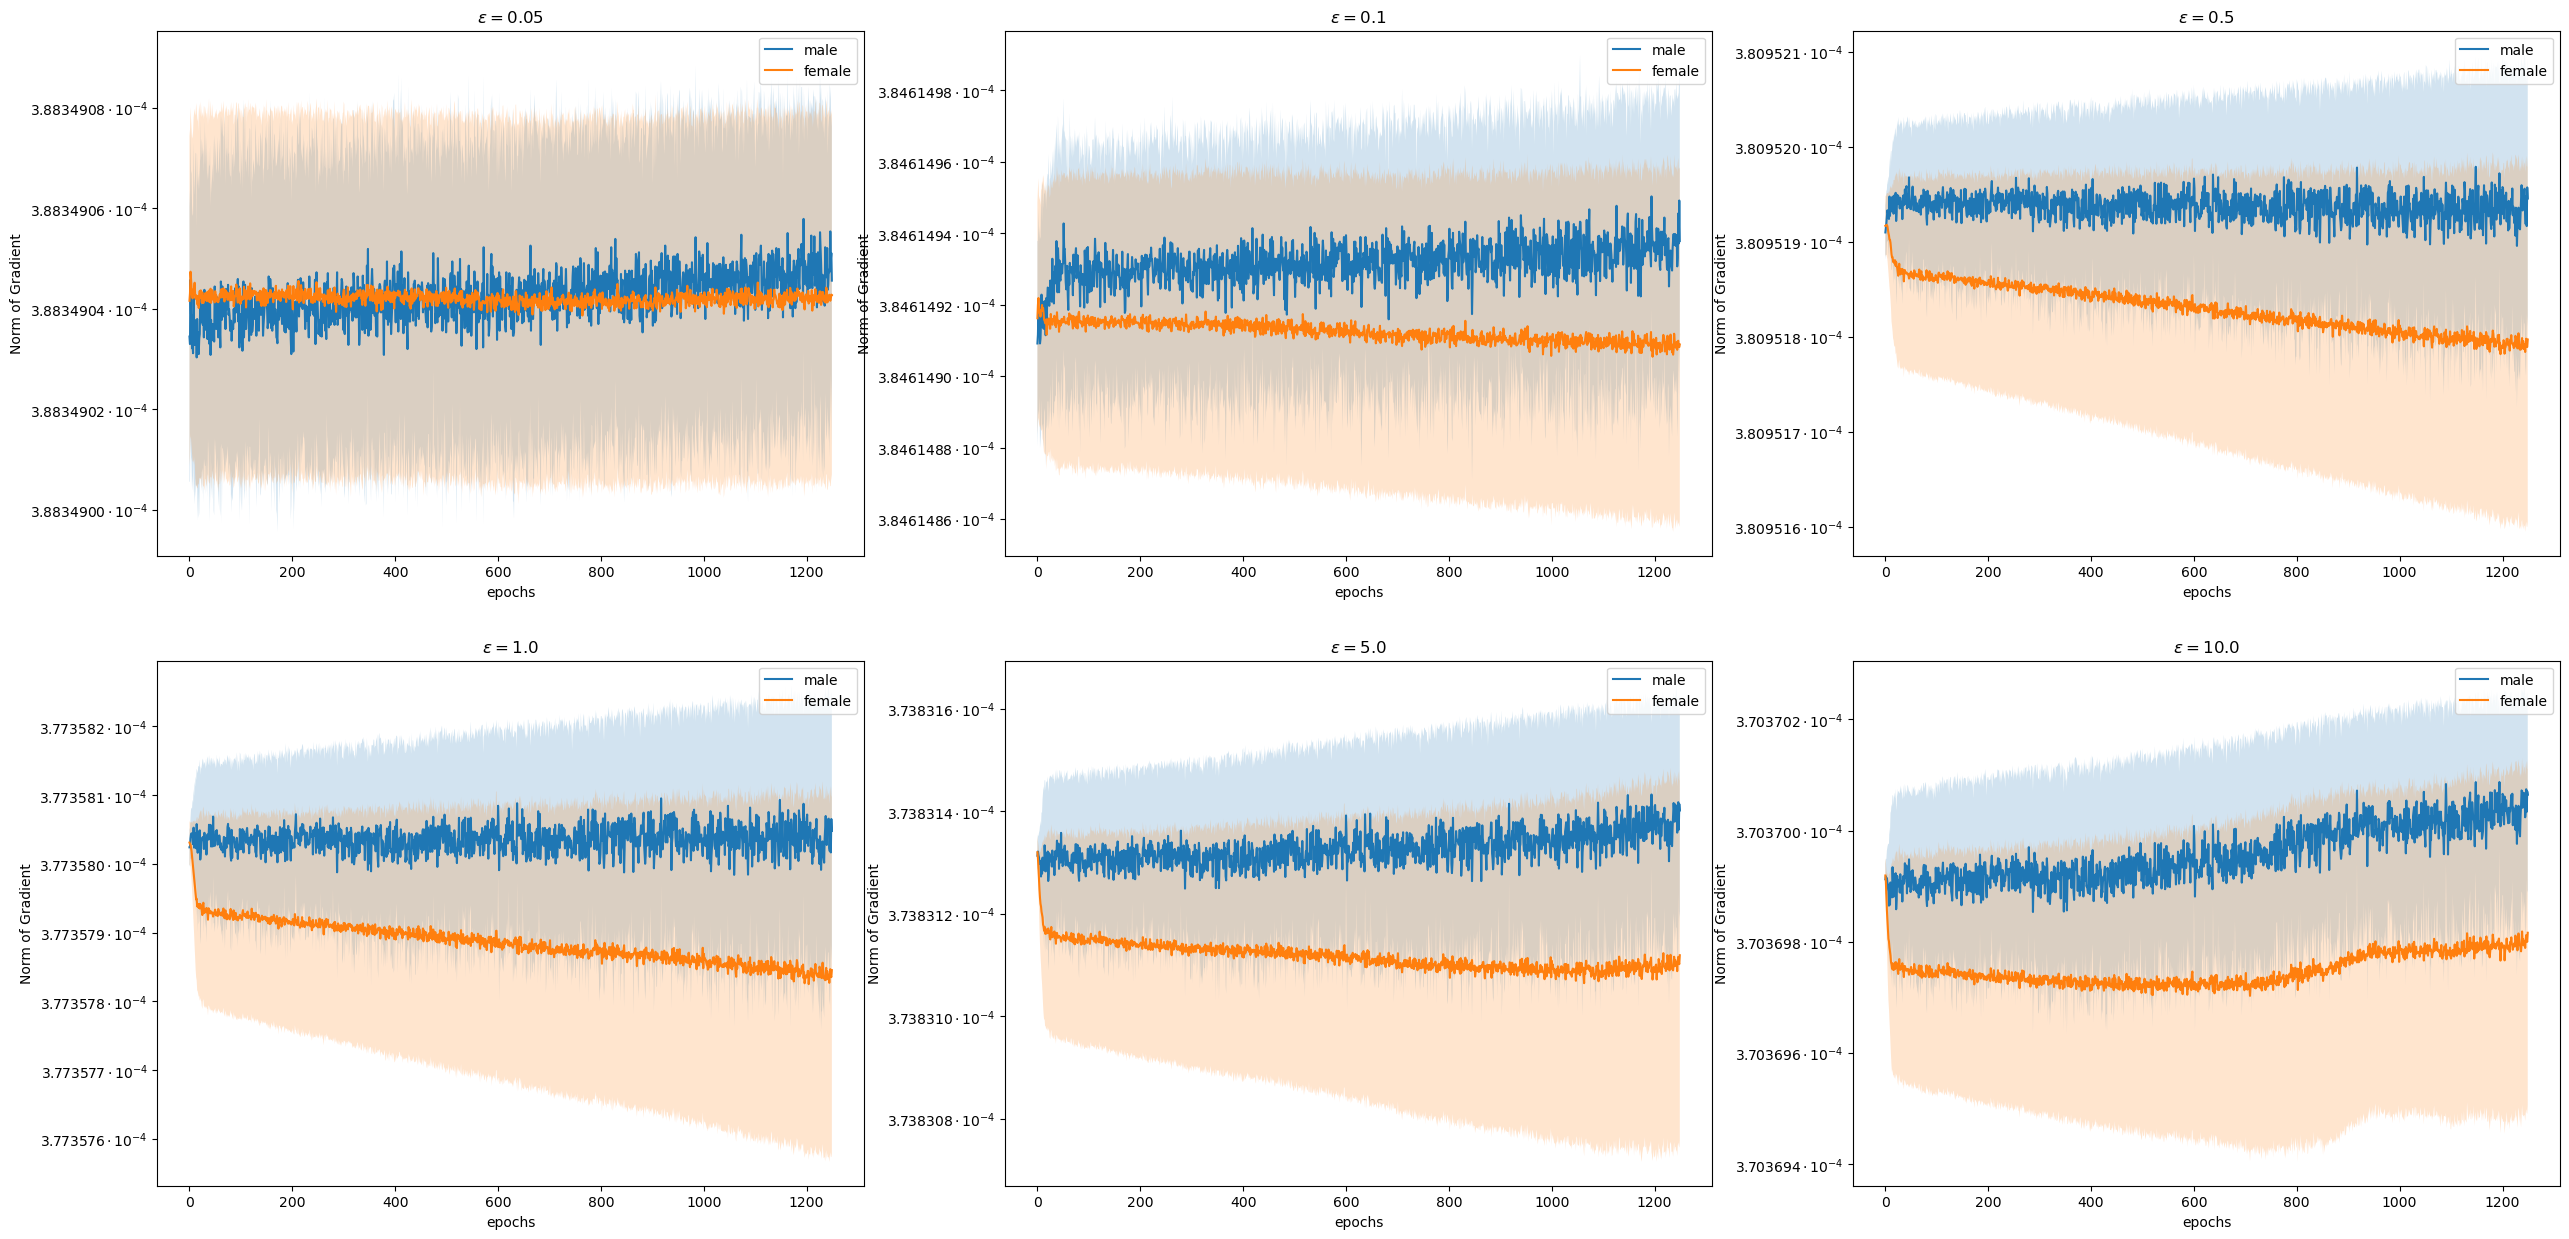

In [37]:
fig, axs = plt.subplots(2, 3, figsize=(31, 15))
noise_scale = [183.45, 96.0, 21.75, 11.5, 2.83, 1.684]
epsilon = [0.05, 0.1, 0.5, 1.0, 5.0, 10.0]

for i, ns in enumerate(noise_scale):
    male_mean = None
    female_mean = None
    male_std = None
    female_std = 0
    row = int(i/3)
    col = int(i%3)
    for j, file in enumerate(file_name):
        if ('bank_' in file) and ('fairdp_' in file) and ('sigma_{}'.format(ns) in file):
            # print(file)
            with open('{}{}'.format(file_path,file), 'rb') as f:
                res = pickle.load(f)
                if (type(male_mean) == type(None)):
                    male_mean = np.array(res['male_norm'])
                    female_mean = np.array(res['female_norm'])
                    male_std = np.array(res['male_std'])
                    female_std = np.array(res['female_std'])
                else:
                    male_mean += np.array(res['male_norm'])
                    female_mean += np.array(res['female_norm'])
                    male_std += np.array(res['male_std'])
                    female_std += np.array(res['female_std'])
                num_file += 1
                
    # plt.plot(range(len(male_norm)), male_norm, label='male')
    # plt.plot(range(len(female_norm)), female_norm, label='female')
    male_mean = male_mean/num_file
    female_mean = female_mean/num_file
    male_std = male_std/num_file
    female_std = female_std/num_file
    axs[row][col].plot(range(len(male_mean)), male_mean, label='male')
    axs[row][col].plot(range(len(female_mean)), female_mean, label='female')
    axs[row][col].set_xlabel('epochs')
    axs[row][col].set_ylabel('Norm of Gradient')
    axs[row][col].set_yscale('logit')
    axs[row][col].fill_between(range(len(male_mean)), male_mean-male_std, male_mean+male_std, alpha=0.2)
    axs[row][col].fill_between(range(len(female_mean)), female_mean-female_std, female_mean+female_std,alpha=0.2)
    axs[row][col].legend()

    axs[row][col].set_title(r"$\epsilon={}$".format(epsilon[i]))

In [40]:
dist = []
for i, ns in enumerate(noise_scale):
    male_mean = None
    female_mean = None
    male_std = None
    female_std = 0
    row = int(i/3)
    col = int(i%3)
    for j, file in enumerate(file_name):
        if ('bank_' in file) and ('fairdp_' in file) and ('sigma_{}'.format(ns) in file):
            # print(file)
            with open('{}{}'.format(file_path,file), 'rb') as f:
                res = pickle.load(f)
                if (type(male_mean) == type(None)):
                    male_mean = np.array(res['male_norm'])
                    female_mean = np.array(res['female_norm'])
                    male_std = np.array(res['male_std'])
                    female_std = np.array(res['female_std'])
                else:
                    male_mean += np.array(res['male_norm'])
                    female_mean += np.array(res['female_norm'])
                    male_std += np.array(res['male_std'])
                    female_std += np.array(res['female_std'])
                num_file += 1
                
    # plt.plot(range(len(male_norm)), male_norm, label='male')
    # plt.plot(range(len(female_norm)), female_norm, label='female')
    male_mean = male_mean/num_file
    female_mean = female_mean/num_file
    male_std = male_std/num_file
    female_std = female_std/num_file
    dist.append(np.abs(np.mean(male_mean) - np.mean(female_mean)))

([<matplotlib.axis.XTick at 0x7feff1996410>,
 [Text(0, 0, '0.05'),
  Text(1, 0, '0.1'),
  Text(2, 0, '0.5'),
  Text(3, 0, '1.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '10.0')])

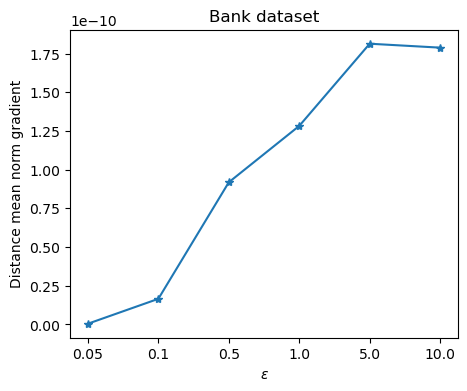

In [44]:
plt.plot(range(len(epsilon)), dist, '-*', label = 'empirical results')
plt.ylabel(r'Distance mean norm gradient')
plt.xlabel(r'$\epsilon$')
plt.title('Bank dataset')
plt.xticks(range(len(epsilon)), epsilon)

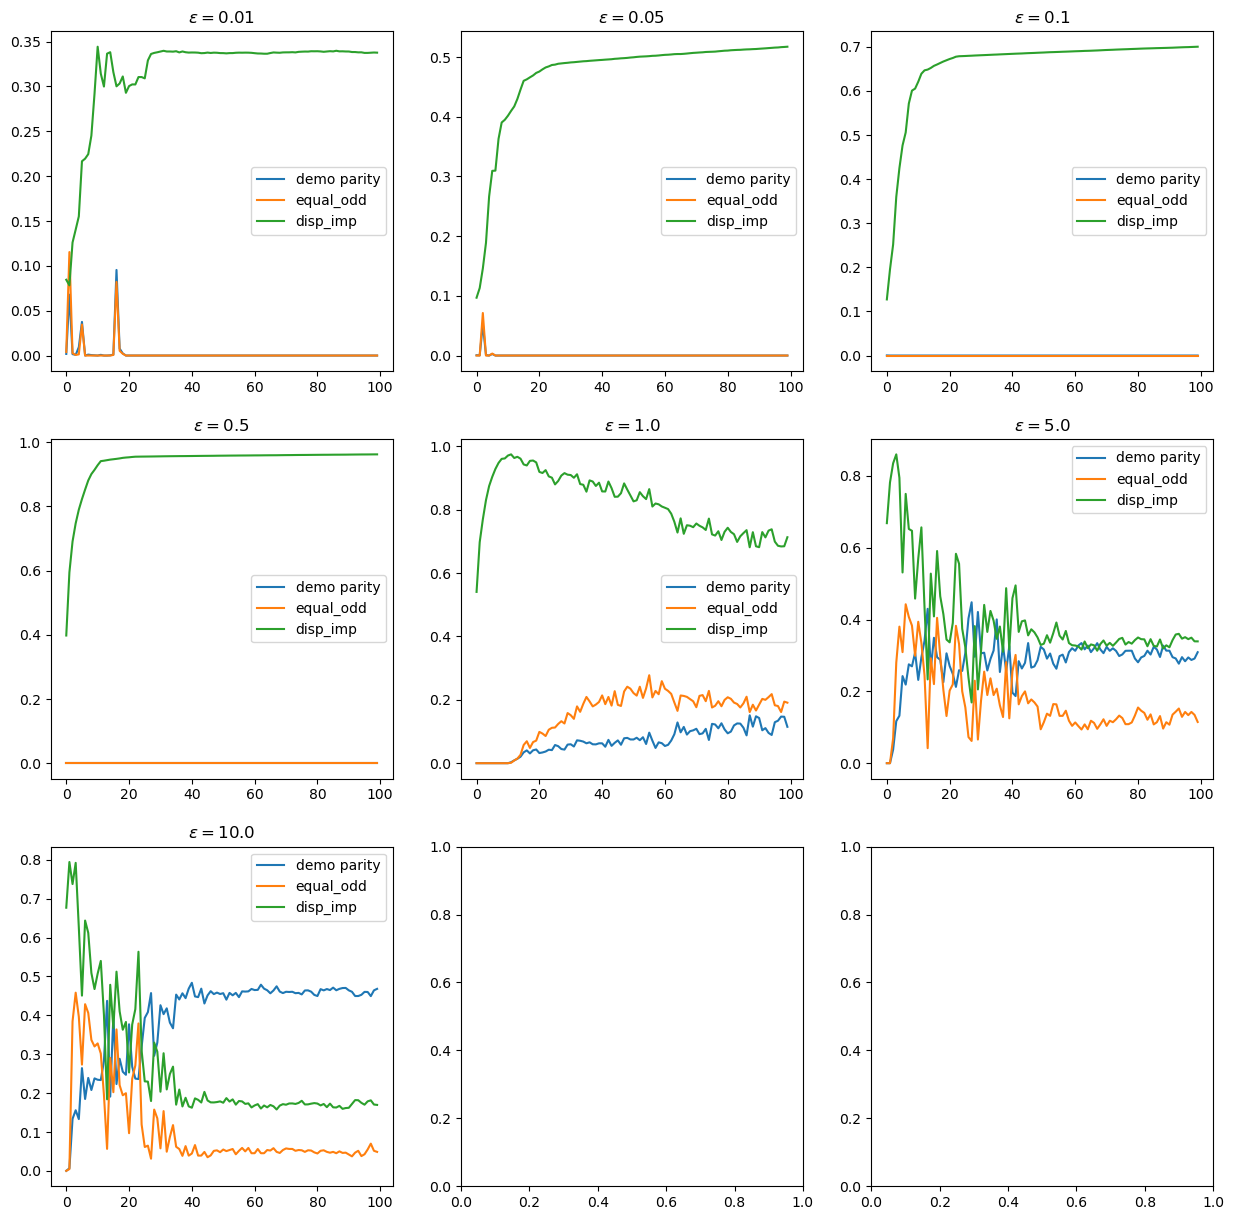

In [17]:
# demo_p = None
# equal_odd = None
# num_file = 0
# for i, file in enumerate(file_name):
#     if ('bank_' in file) and ('fair_' in file):
#         # print(file)
#         with open('{}{}'.format(file_path,file), 'rb') as f:
#             res = pickle.load(f)
#             if (type(demo_p) == type(None)):
#                 demo_p = np.array(res['demo_parity'][:100])
#                 equal_odd = np.array(res['equal_odd'][:100])
#             else:
#                 demo_p += np.array(res['demo_parity'][:100])
#                 equal_odd += np.array(res['equal_odd'][:100])                    
#             num_file += 1
# plt.plot(demo_p/num_file, label='demo parity')
# plt.plot(equal_odd/num_file, label='equal_odd')
# plt.legend()

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, ns in enumerate(noise_scale):
    demo_p = None
    equal_odd = None
    disp_imp = None
    num_file = 0
    row = int(i/3)
    col = int(i%3)
    for j, file in enumerate(file_name):
        if ('bank_' in file) and ('fairdp_' in file) and ('sigma_{}'.format(ns) in file):
            # print(file)
            with open('{}{}'.format(file_path,file), 'rb') as f:
                res = pickle.load(f)
                if (type(demo_p) == type(None)):
                    demo_p = np.array(res['demo_parity'][:100])
                    equal_odd = np.array(res['equal_odd'][:100])
                    disp_imp = np.array(res['disp_imp'][:100])
                else:
                    demo_p += np.array(res['demo_parity'][:100])
                    equal_odd += np.array(res['equal_odd'][:100]) 
                    disp_imp += np.array(res['disp_imp'][:100])
                num_file += 1
    axs[row][col].plot(demo_p/num_file, label='demo parity')
    axs[row][col].plot(equal_odd/num_file, label='equal_odd')
    axs[row][col].plot(disp_imp/num_file, label='disp_imp')
    axs[row][col].legend()
    axs[row][col].set_title(r"$\epsilon={}$".format(epsilon[i]))
                

# performance = []

#     num_file = 0
#     test_acc = 0
#     for i, file in enumerate(file_name):
#         if ('bank_' in file) and ('sigma_{}'.format(ns) in file) and ('fairdp_' in file):
#             # print(file)
#             with open('{}{}'.format(file_path,file), 'rb') as f:
#                 res = pickle.load(f)
#                 test_acc += res['test_history_acc'][-1]
#                 num_file += 1
#     performance.append(test_acc/num_file)
    
# demo_parity = []
# for ns in noise_scale:
#     num_file = 0
#     dev = 0
#     for i, file in enumerate(file_name):
#         if ('bank_' in file) and ('sigma_{}'.format(ns) in file) and ('fairdp_' in file):
#             with open('{}{}'.format(file_path,file), 'rb') as f:
#                 res = pickle.load(f)
#                 # print(res.keys())
#                 dev += res['demo_parity'][-1]
#                 num_file += 1
#     demo_parity.append(dev/num_file)
    
# equal_odd = []
# for ns in noise_scale:
#     num_file = 0
#     dev = 0
#     for i, file in enumerate(file_name):
#         if ('bank_' in file) and ('sigma_{}'.format(ns) in file) and ('fairdp_' in file):
#             with open('{}{}'.format(file_path,file), 'rb') as f:
#                 res = pickle.load(f)
#                 # print(res.keys())
#                 dev += res['equal_odd'][-1]
#                 num_file += 1
#     equal_odd.append(dev/num_file)
    
# dis_imp = []
# for ns in noise_scale:
#     num_file = 0
#     dev = 0
#     for i, file in enumerate(file_name):
#         if ('bank_' in file) and ('sigma_{}'.format(ns) in file) and ('fairdp_' in file):
#             with open('{}{}'.format(file_path,file), 'rb') as f:
#                 res = pickle.load(f)
#                 # print(res.keys())
#                 dev += res['disp_imp'][-1]
#                 num_file += 1
#     dis_imp.append(dev/num_file)